In [1]:
#########IMPORT##########
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time as t

from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize
import os

from sklearn import datasets 
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

#########CODE##############

# On récupère les images et leur label
start_time = t.time()
img = []
label = []
for root, __, files in os.walk('./fruits/'):
  path = root + '/'
  print(path)
  nom = path.replace('./fruits/','')
  nom = nom.replace("/", '')
  print(nom)
  for file in files:
    img.append( cv2.imread(root + '/' + file) )
    label.append(nom)


# On découpe aléatoirement en train et test
xtrain,  xtest,  ytrain,  ytest  =  train_test_split(img,  label, train_size=0.7)


# Créer tous les HOGs.
def preprocessing(images):
  Fd, Hog = [], []
  for img in images:
    res = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

    Fd.append(res[0])
    Hog.append(res[1])

  return Fd, Hog


# On crée les hogs et on fit
HogTrain = preprocessing(xtrain)[1] #parametre à changer
for i in range(len(HogTrain)):
  HogTrain[i] = HogTrain[i].flatten() # utile ici, pas tout le temps ?

clf = MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes = (50), verbose = False, early_stopping=True)
clf.fit(HogTrain, ytrain)


#score
HogTest = preprocessing(xtest)[1] #parametre à changer
for i in range(len(HogTest)):
  HogTest[i] = HogTest[i].flatten() # utile ici, pas tout le temps ?
predict = clf.predict(HogTest)
print(clf.score(HogTest, ytest))
print(t.time() - start_time)

#Save model
from joblib import dump, load
dump(clf, './fruits_4.npy' )


./fruits//

./fruits/Apple Crimson Snow/
Apple Crimson Snow
./fruits/Apple Golden/
Apple Golden
./fruits/Apple Red/
Apple Red
./fruits/Banana/
Banana
./fruits/Watermelon/
Watermelon
1.0
98.90753436088562


['./fruits_4.npy']

In [2]:
pom = plt.imread("./pomme.jpg")
print(len(pom[0]))

225


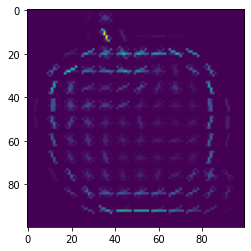

In [3]:
pomr = resize(pom,(100,100))
_ , h = hog(pomr, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.imshow(h)

In [5]:
print(clf.predict([h.flatten()]))
print(len(h.flatten()))

['Watermelon']
10000
